# Locally Weighted Linear Regression: Sine Data Set
First, generate the data set then plot.

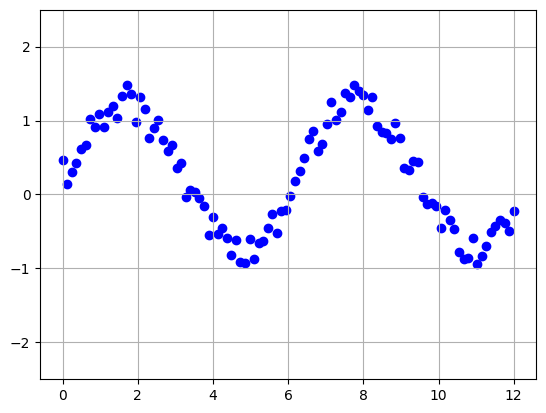

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x = np.linspace(0,12,100).reshape(-1,1)
y = np.sin(x) + 0.5*np.random.rand(100,1)
plt.scatter(x,y,color='b')
plt.ylim([-2.5, 2.5])
plt.grid()
plt.show()

Normalize the data then visualize again.

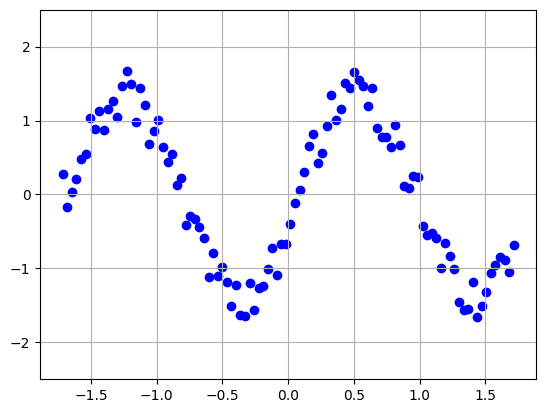

In [2]:
scalerX = StandardScaler()
x2 = scalerX.fit_transform(x)
scalerY = StandardScaler()
y2 = scalerY.fit_transform(y)
plt.scatter(x2,y2,color='b')
plt.ylim([-2.5, 2.5])
plt.grid()
plt.show()

Define the prediction model for any query input x.

In [3]:
def weighting(x,X,tau):
    return np.exp(-(x-X)**2/(2*tau**2))

def predictbyLWR(x,X,y,tau):
    N = X.shape[0]
    W = np.diagflat(weighting(x,X,tau))            # Weighting Function
    X = np.append(np.ones((N,1)), X, axis=1)       # Add bias
    w = np.linalg.pinv(X.T @ W @ X)@(X.T @ W @ y)  # Compute coefficients
    return np.append(1, x) @ w

Predict the y over finely spaced x

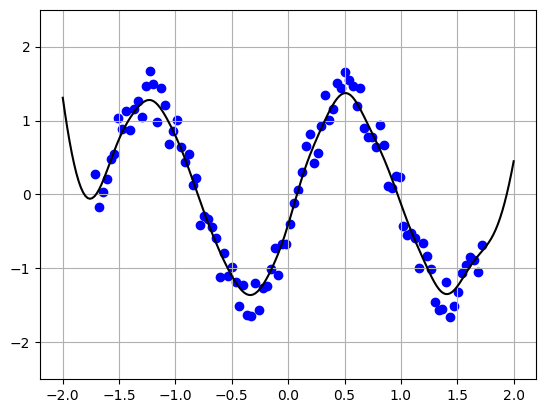

In [4]:
tau = 0.1     # Chosen bandwidth
ypred = []    # Store results here
x3 = np.linspace(-2,2,200).reshape(-1,1)
for xi in x3:
    ypred.append(predictbyLWR(xi,x2,y2,tau))
    
plt.scatter(x2,y2,color='b')
plt.plot(x3,ypred,color='k')
plt.ylim([-2.5, 2.5])
plt.grid()
plt.show()